 IMPORT THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
print("Setup Complete")

Setup Complete


In [2]:
train = pd.read_csv("Train_v2.csv")
test = pd.read_csv('Test_v2.csv')

In [3]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
#test['uniqueid']= test['uniqueid']+' x '+test['country']
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [5]:
#test.set_index("uniqueid")

In [6]:
train.shape

(23524, 13)

In [7]:
test.shape

(10086, 12)

 CHECK FOR MISSING VALUES

In [8]:
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [9]:
print('missing value:', test.isnull().sum())

missing value: country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


 DATA EXPLORATION

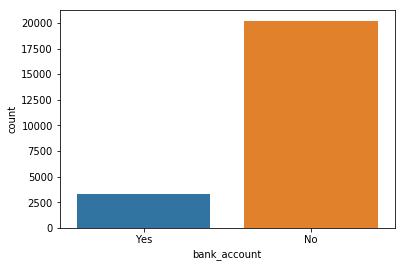

In [10]:
sns.countplot(x = "bank_account",data = train)

In [11]:
# THE DATA SEEMS IMBALANCE, WE MIGHT NEED TO BALANCE IT

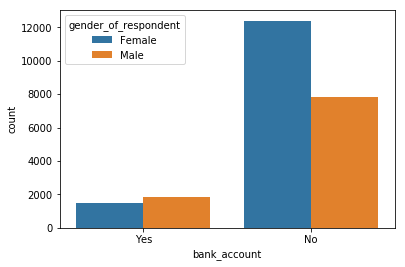

In [12]:
sns.countplot(x = "bank_account", hue = "gender_of_respondent", data = train)

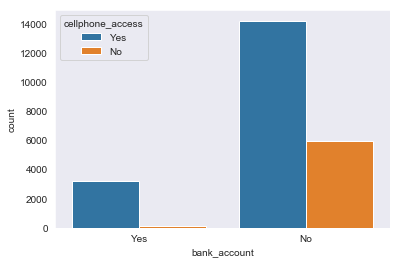

In [13]:
sns.set_style("dark")
sns.countplot(x ="bank_account", hue = "cellphone_access", data = train)

(array([4809., 5480., 4707., 2785., 2164., 1733.,  965.,  640.,  189.,
          52.]),
 array([ 16. ,  24.4,  32.8,  41.2,  49.6,  58. ,  66.4,  74.8,  83.2,
         91.6, 100. ]),
 <a list of 10 Patch objects>)

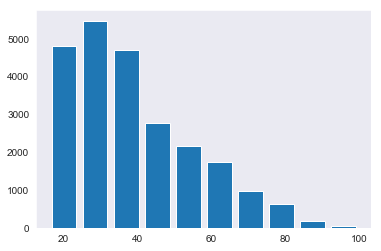

In [14]:
plt.hist(train['age_of_respondent'], histtype = 'bar',rwidth = 0.8)

(array([8.286e+03, 7.394e+03, 4.949e+03, 2.151e+03, 5.530e+02, 1.370e+02,
        3.500e+01, 1.500e+01, 2.000e+00, 2.000e+00]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <a list of 10 Patch objects>)

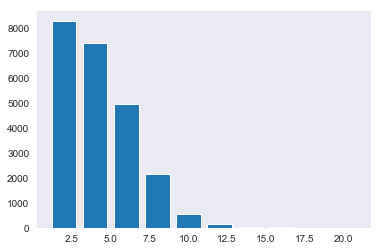

In [15]:
plt.hist(train['household_size'], histtype = 'bar',rwidth = 0.8)

In [16]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


 CONVERTING CATEGORICAL VARIABLE TO NUMERIC USING PANDAS DUMMY

In [17]:
train_dummies = pd.get_dummies(train, columns = ["location_type","cellphone_access","gender_of_respondent",
                                                "relationship_with_head","marital_status","education_level","job_type"],prefix = 
                               ["location","cellphone","gender",'relationship','marital','education','job'],
                               drop_first = True)
train_dummies.head()


,country,year,uniqueid,bank_account,household_size,age_of_respondent,location_Urban,cellphone_Yes,gender_Male,relationship_Head of Household,...,education_Vocational/Specialised training,job_Farming and Fishing,job_Formally employed Government,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed
0,Kenya,2018,uniqueid_1,Yes,3,24,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,uniqueid_2,No,5,70,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,uniqueid_3,Yes,5,26,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3,Kenya,2018,uniqueid_4,No,5,34,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,uniqueid_5,No,8,26,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
train['bank_account'] = train['bank_account'].map({"Yes":1, "No":0})

In [19]:
train_new = train_dummies

In [20]:
train_new.drop(["country", "uniqueid"], axis =1, inplace = True)

In [21]:
test_dummies = pd.get_dummies(test, columns = ["location_type","cellphone_access","gender_of_respondent","relationship_with_head",
                                               "marital_status","education_level","job_type"],prefix = ["location","cellphone",
                                                "gender",'relationship','marital','education','job'],
                               drop_first = True)
test_dummies.head()

,country,year,uniqueid,household_size,age_of_respondent,location_Urban,cellphone_Yes,gender_Male,relationship_Head of Household,relationship_Other non-relatives,...,education_Vocational/Specialised training,job_Farming and Fishing,job_Formally employed Government,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed
0,Kenya,2018,uniqueid_6056,3,30,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,Kenya,2018,uniqueid_6060,7,51,1,1,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,Kenya,2018,uniqueid_6065,3,77,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Kenya,2018,uniqueid_6072,6,39,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,Kenya,2018,uniqueid_6073,3,16,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
test_new = test_dummies

In [23]:
test_new.drop(['country',"uniqueid"],inplace = True, axis=1)

In [24]:
X = train_new.drop(['bank_account'], axis=1)
y = train_new['bank_account']

In [25]:
#Rescale by importing StandardScalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
test_new = scaler.fit_transform(test_new)

In [26]:
#Split train data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_new, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)

In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [29]:
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

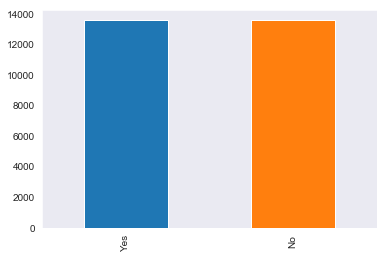

In [30]:
pd.Series(y_train_new).value_counts().plot.bar()

In [31]:
xmodel = XGBClassifier(gamma = 0.5, min_child_weight = 5,colsample_bytree = 0.6,
                       subsample = 0.6, max_depth = 5)
xmodel = XGBClassifier()    
xmodel.fit(X_train,y_train)
pred_05 = xmodel.predict(X_valid)
accuracy_score(pred_05,y_valid)


0.8914079608398815

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [32]:
print("error rate:", 1 - accuracy_score(y_valid, pred_05))

error rate: 0.1085920391601185


In [33]:
sample = pd.read_csv('SubmissionFile.csv', index_col = "uniqueid")
sample.head()

,bank_account
uniqueid,
uniqueid_7867 x Kenya,1.0
uniqueid_6722 x Kenya,0.0
uniqueid_6714 x Kenya,1.0
uniqueid_8103 x Kenya,1.0
uniqueid_8657 x Kenya,1.0


In [34]:
test_pred1 = xmodel.predict(test_new)
submission_df= pd.DataFrame({'uniqueid': test['uniqueid'] + " x " + test["country"],
                              "bank_account":test_pred1})

In [35]:
submission_df.to_csv('Subfile.csv', index = False)